In [70]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [71]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [72]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [73]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [74]:
# reflect an existing database into a new model
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/10-Advanced-Data-Storage-and-Retrieval/2/Activities/05-Ins_Reflection/Solved/Ins_Reflection.ipynb
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/10-Advanced-Data-Storage-and-Retrieval/2/Activities/09-Par_EmojiPlotting/Solved/Stu_Plotting.ipynb
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/10-Advanced-Data-Storage-and-Retrieval/3/Activities/11-Stu_Chinook_Database_Analysis/Solved/Stu_Chinook.ipynb
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [75]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [76]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [77]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [78]:
# Find the most recent date in the data set.
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/10-Advanced-Data-Storage-and-Retrieval/3/Activities/02-Ins_Dates/Solved/Ins_Dates.ipynb
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("The most recent date is: ", most_recent_date)

The most recent date is:  ('2017-08-23',)


In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/10-Advanced-Data-Storage-and-Retrieval/3/Activities/02-Ins_Dates/Solved/Ins_Dates.ipynb
# Calculate the date one year from the last date in data set.
last_12_months = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", last_12_months)

Query Date:  2016-08-23


In [80]:
# Perform a query to retrieve the data and precipitation scores
data_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_12_months).all()
for record in data_scores:
    print(record)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [81]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climatescore_df = pd.DataFrame(data_scores, columns = ["date", "prcp"])
climatescore_df.set_index("date", inplace=True)

In [82]:
# Sort the dataframe by date
climatescore_df = climatescore_df.sort_values(["date"])
climatescore_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


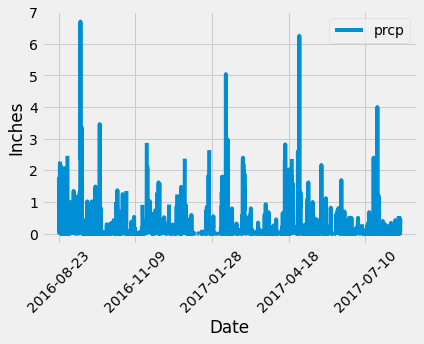

In [90]:
# Use Pandas Plotting with Matplotlib to plot the data
climatescore_df.plot(rot=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig("Images/precipitation_chart.png")
plt.show()

In [92]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climatescore_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()